In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_peng = sns.load_dataset("penguins")
df_peng = df_peng.dropna()
df_peng.shape

(333, 7)

In [2]:
sns.set_context("talk")

In [3]:
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import matplotlib.colors as mcolors
import colorsys

def set_hls(c, dh=0, dl=0, ds=0, dalpha=0):
    """
    c : (array -like, str) color in RGB space
    dh : (float) change in Hue
        default = 0
    dl : (float) change in Lightness
        default = 0
    ds : (float) change in Saturation
        default = 0
    """
    # 입력된 color를 RGBA numpy array로 변환
    c_rgba = mcolors.to_rgba(c)
    
    # RGB와 alpha 분리
    c_rgb = c_rgba[:3]
    alpha = c_rgba[3]
    
    # RGB 색공간을 HLS 색공간으로 변환 후 입력된 변화 적용
    c_hls = colorsys.rgb_to_hls(*c_rgb)
    h = c_hls[0] + dh
    l = max(min(c_hls[1] + dl, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    s = max(min(c_hls[2] + ds, 1), 0)     # 0~1 범위를 넘지 않도록 제어
    
    # HLS 색공간에서 변경된 색을 RGB 색공간으로 변환
    c_rgb_new = colorsys.hls_to_rgb(h, l, s)
    alpha = max(min(alpha+dalpha, 1), 0)  # 0~1 범위를 넘지 않도록 제어
    
    return np.append(c_rgb_new, alpha) # alpha 추가하여 return

In [5]:
im = plt.imread("tiger.jpg")
im.shape

(1200, 1600, 3)

In [6]:
im_dhls0 = np.array([set_hls(p, ds=-0.5) for p in im.reshape(-1, 3)/255]).reshape(1200, 1600, 4)
im_dhls1 = np.array([set_hls(p, ds=-1) for p in im.reshape(-1, 3)/255]).reshape(1200, 1600, 4)

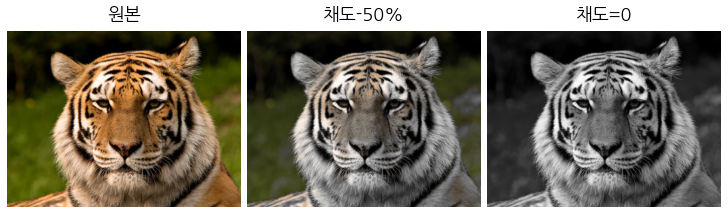

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 3), constrained_layout=True)

axs[0].imshow(im)
axs[1].imshow(im_dhls0)
axs[2].imshow(im_dhls1)

titles = ["원본", "채도-50%", "채도=0"]
for ax, title in zip(axs, titles):
    ax.axis(False)
    ax.set_title(title, pad=12)
    
fig.savefig("112_sethls_02.png")

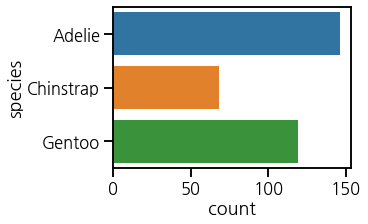

In [8]:
fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
sns.countplot(y="species", data=df_peng, ax=ax)

fig.savefig("112_sethls_04.png")

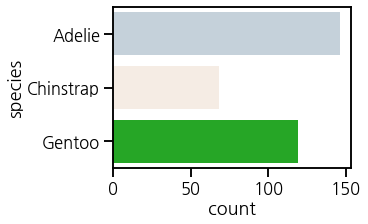

In [9]:
for i, p in enumerate(ax.patches):
    if i < 2:
        fc = set_hls(p.get_fc(), dl=0.4, ds=-0.3)
    else:
        fc = set_hls(p.get_fc(), ds=0.2)
    p.set_fc(fc)
        
display(fig)
fig.savefig("112_sethls_05.png")

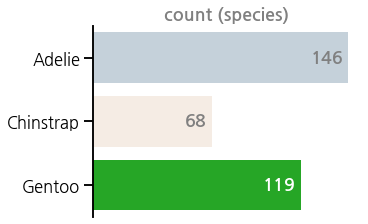

In [10]:
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.set(xticks=[], xlabel="", ylabel="")
ax.set_title("count (species)", color="gray", fontweight="bold")

for i, p in enumerate(ax.patches):
    x, width = p.get_x(), p.get_width()
    c = "gray" if i < 2 else "w"
    ax.text(width-3, i, f"{width}", c=c,
            ha="right", va="center", fontweight="bold")

display(fig)
fig.savefig("112_sethls_06.png")

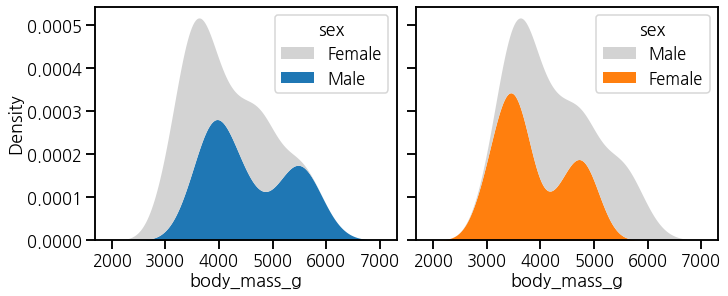

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4), constrained_layout=True,
                       sharex=True, sharey=True)

sns.kdeplot(x="body_mass_g", data=df_peng, multiple="stack",
            palette=["lightgray", "C0"], alpha=1, linewidths=0,
            hue="sex", hue_order=["Female", "Male"], ax=axs[0])
sns.kdeplot(x="body_mass_g", data=df_peng, multiple="stack",
            palette=["lightgray", "C1"], alpha=1, linewidths=0,
            hue="sex", ax=axs[1])

fig.savefig("112_sethls_07.png")

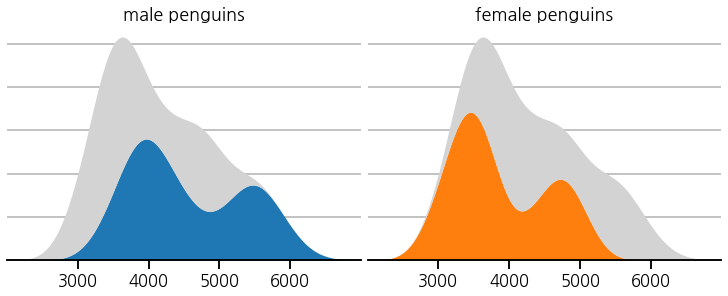

In [12]:
titles = ["male penguins", "female penguins"]
for ax, title in zip(axs, titles):
    # ticklabels, x/y label, title, facecolor
    ax.set(xlim=(2001, 6999), yticklabels=[], xlabel="", ylabel="", title=title, facecolor="none")
    
    # ytick length = 0
    ax.tick_params(axis="y", length=0)
    
    # spines 제거
    ax.spines[["left", "top", "right"]].set_visible(False)
    
    # grid
    ax.yaxis.set_zorder(-1)
    ax.grid(axis="y")
    
    # legend 제거
    legend = ax.get_legend()
    legend.remove()

fig.savefig("112_sethls_08.png")
display(fig)

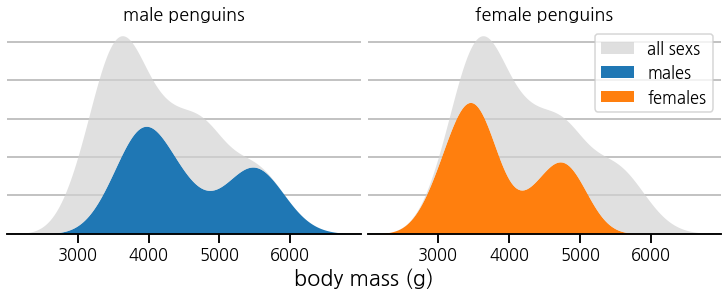

In [13]:
# common xlabel
fig.supxlabel("body mass (g)", fontsize="large")

# 투명도 설정
all_sexs = [axs[0].collections[1], axs[1].collections[1]]
for a in all_sexs:
    a.set_alpha(0.7)

# 새 legend 추가
handles = [axs[0].collections[1], axs[0].collections[0], axs[1].collections[0]]
labels = ["all sexs", "males", "females"]
axs[1].legend(handles=handles, labels=labels, loc="upper right")

fig.savefig("112_sethls_09.png")
display(fig)

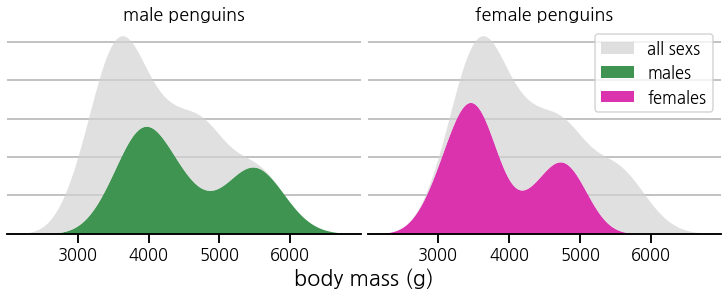

In [14]:
# 성별 밀도 함수 객체 색상 변경
sexs = [axs[0].collections[0], axs[1].collections[0]]
for p in sexs:
    fc = p.get_facecolor()
    p.set_facecolor(set_hls(fc, dh=0.8, ds=-0.3))

# handles 변경을 legend에 반영    
handles = [axs[0].collections[1], axs[0].collections[0], axs[1].collections[0]]
labels = ["all sexs", "males", "females"]
axs[1].legend(handles=handles, labels=labels, loc="upper right")

fig.savefig("112_sethls_10.png")
display(fig)